# Evaluación Final · Módulo 3 

## 0. Pre-Fase: Comprensión de los Datos

En este proyecto trabajamos con dos archivos que, juntos, nos permiten entender cómo son los clientes y cómo usan el programa de fidelidad de la aerolínea.

### 1. Customer Flight Activity.csv  
Este archivo explica **qué hace cada cliente cada mes**. Incluye:

- Identificador del cliente (**Loyalty Number**)
- Año (**Year**) y mes (**Month**) del registro
- Vuelos reservados (**Flights Booked**)
- Vuelos con acompañantes (**Flights with Companions**)
- Total de vuelos acumulados (**Total Flights**)
- Distancia volada (**Distance**)
- Puntos ganados (**Points Accumulated**)
- Puntos gastados (**Points Redeemed**)
- Valor en dólares de los puntos gastados (**Dollar Cost Points Redeemed**)

Con este archivo vemos el comportamiento mensual: cuánto vuela, cuántos puntos mueve y cómo evoluciona su actividad.

### 2. Customer Loyalty History.csv  
Este archivo explica **cómo es cada cliente**. Incluye:

- Identificador del cliente (**Loyalty Number**)
- País (**Country**), provincia (**Province**), ciudad (**City**) y código postal (**Postal Code**)
- Género (**Gender**)
- Nivel educativo (**Education**)
- Salario anual (**Salary**)
- Estado civil (**Marital Status**)
- Tipo de tarjeta de fidelidad (**Loyalty Card**)
- Valor total del cliente (**CLV**)
- Tipo de inscripción (**Enrollment Type**)
- Año y mes de inscripción (**Enrollment Year**, **Enrollment Month**)
- Año y mes de cancelación, si aplica (**Cancellation Year**, **Cancellation Month**)

Con este archivo entendemos el perfil del cliente: dónde vive, su formación, su situación personal y el tipo de relación que tiene con el programa.


## 0. Librerías 

In [2]:
# Elegimos estas librerías porque son el estándar simple y eficiente para análisis de datos: 
# pandas y numpy para trabajar con tablas y números, 
# matplotlib + seaborn para visualizar, 
# y os para gestionar rutas y carga de archivos. 
# Además, ajustamos las opciones de pandas  para ver mejor los datos en el notebook.


#  ------------------------------
# Librerías principales
# ------------------------------

import pandas as pd        # pandas → trabajar con datos en tablas (DataFrames). Es la base de todo el análisis.
import numpy as np         # numpy → operaciones numéricas y manejo de np.nan. Lo usa pandas internamente.
import os                  # os → comprobar rutas y cargar archivos sin errores.

# Visualización
import matplotlib.pyplot as plt   # matplotlib → motor de gráficos. Aunque uses seaborn, lo necesitas para ajustes finos.
import seaborn as sns             # seaborn → gráficos más claros y fáciles. Ideal para análisis exploratorio.

# ------------------------------
# Configuración del entorno
# ------------------------------

pd.set_option('display.max_columns', None)  # Muestra todas las columnas al imprimir un DataFrame (evita cortes).
pd.set_option('display.max_rows', 100)      # Limita la salida a 100 filas para no saturar la pantalla.


## Fase 1: Exploración y Limpieza

## Metodología

- Antes de mezclar los dos archivos, miramos qué trae cada uno.
- Cada dataset puede venir con fallos: datos que faltan (valores nulos), filas repetidas (duplicados), números que no tienen sentido (outliers), etc.
- Si limpiamos cada archivo por separado, evitamos problemas cuando los unamos.

## CSV A – “Customer Flight Activity.csv”

### CSV A – Fase 1: Exploración inicial

In [3]:
# Ruta del archivo 
# El CSV no está en la misma carpeta que el notebook. 
# Está dentro de una carpeta específica. 
# Por eso la ruta se escribe como: "carpeta/archivo.csv". 
# En este caso, el archivo está en la carpeta "data" → "data/archivo.csv".
ruta = "data/Customer Flight Activity.csv"

# Comprobamos si el archivo existe antes de cargarlo
if os.path.exists(ruta):
    # Si existe → lo cargamos en un DataFrame
    df_flight = pd.read_csv(ruta)   
    print("✅ Archivo cargado correctamente")

# Si no existe → nos avisa y evitamos errores posteriores  
else:
    print("⚠️ Archivo no encontrado")  
    df_flight = None                 

✅ Archivo cargado correctamente


In [4]:
# 1️⃣ DIMENSIÓN DEL DATASET (FILAS Y COLUMNAS)

# .shape devuelve una tupla con dos valores: (n_filas, n_columnas)
print(f"Filas: {df_flight.shape[0]} | Columnas: {df_flight.shape[1]}")

# con .columns podemos ver las columnas pero muestra un Index; 
# si queremos verlo como lista → .tolist()
print("Columnas:", df_flight.columns.tolist())

# ------------------------------
# Anotaciones 

# COLUMNAS = "¿QUÉ PUEDO MEDIR?"
# Cada columna representa una variable distinta 
# (ej.: vuelos reservados, distancia volada, puntos acumulados, número de acompañantes, etc.).

# FILAS = "¿CUÁNTOS CASOS TENGO?"
# Más de 400.000 filas = dataset grande (por encima de 100K).
# Cuantos más casos, más representativos serán los resultados del análisis.


Filas: 405624 | Columnas: 10
Columnas: ['Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']


In [5]:
# 2️⃣ INFORMACIÓN GENERAL DE LOS DATOS (TIPOS DE DATOS Y VALORES NULOS)

# info() nos da:
# - número de filas (entries) y columnas (columns)
# - tipo de dato de cada columna (Dtype)
# - cuántos valores no nulos tiene cada columna (Non-Null Count)
df_flight.info()

# También podemos ver cuántas columnas hay de cada tipo
df_flight.dtypes.value_counts()

# ------------------------------
# Anotaciones

# Tipos de datos:
# - El dataset tiene 405,624 filas y 10 columnas.
# - Casi todas las columnas son numéricas enteras (int64).
# - 'points_accumulated' es la única columna con decimales (float64).
# - No hay columnas categóricas (tipo object).

# Posibles mejoras en la fase de limpieza:
# - Convertir 'year' y 'month' a categóricas (son etiquetas, no valores para operar).
# - Convertir 'loyalty_number' a string, porque tiene muchos valores únicos.

# Valores nulos:
# - No hay valores faltantes en ninguna columna (todas tienen 405,624 non-null).


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


int64      9
float64    1
Name: count, dtype: int64

In [6]:
# 3️⃣ INSPECCIÓN DE REGISTROS (PRIMERAS, ÚLTIMAS Y FILAS ALEATORIAS)

# Primeras filas
display(df_flight.head()) 
# Últimas filas                    
display(df_flight.tail())   
# Filas aleatorias (42 = fila fija → podemos elegir cualquier fila del dataset)               
display(df_flight.sample(5, random_state=42)) 

# Nota:
# DataFrames → display() (mejor visualización en notebooks)
# Texto y números → print()

# ------------------------------
# Anotaciones

# Observaciones generales:
# - No se observan valores negativos.
# - Los datos parecen completos: no se ven valores nulos (datos que no están presentes), 
# lo que coincide con info().

# Primeras filas:
# - Confirman que el archivo se cargó bien y muestran la estructura del dataset.
# - Cada fila representa la actividad mensual de un cliente (Year + Month).

# En la fase de limpieza:
# - Los nombres de las columnas pueden generar inconvenientes; conviene estandarizarlos
#   (minúsculas, sin espacios, formato snake_case).
# - Verificar que total_flights coincida con la suma de vuelos individuales y con acompañantes,
#   garantizando coherencia de los datos.


# - Points redeemed (puntos canjeados) aparece con muchos ceros:
#   • Acumular puntos → siempre ocurre (Points accumulated).
#   • Canjear puntos → no se observa; puede ser por falta de puntos o por no usar el programa.

# Últimas filas:
# - Se revisan para detectar posibles totales, notas o filas no válidas.
# - En este dataset, las últimas filas también son registros reales de clientes.

# Muestra aleatoria:
# - Sirve para detectar errores que no aparecen en head o tail.
# - En la muestra no se observan valores anómalos.


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
182259,802535,2017,11,0,0,0,0,0.0,0,0
78391,674643,2017,5,0,0,0,0,0.0,0,0
24345,496371,2017,2,4,4,8,1512,151.0,0,0
297818,659419,2018,6,0,0,0,0,0.0,0,0
203891,158560,2018,1,3,0,3,1911,191.0,0,0


In [7]:
# 4️⃣ RESUMEN DE VALORES

# 1. VALORES NUMÉRICOS
# describe().T muestra estadísticas básicas de todas las columnas numéricas
display(df_flight.describe().T)

# 2. VALORES CATEGÓRICOS
# - En esta fase exploramos lo que realmente existe en los datos.
# - info() ya mostró que NO hay columnas tipo object.
# - describe(include='object') no aportaría nada porque no hay variables categóricas.

# ------------------------------
# Anotaciones VALORES NUMÉRICOS

# Columna relevante:
# - 'total_flights' es la variable clave para medir la actividad mensual del cliente.

# 1) Integridad (count)
# - Todas las columnas tienen 405,624 registros.
# - Confirmamos que no hay valores nulos; los datos están completos.

# 2) Rangos y coherencia (min y max)
# - Años: solo aparecen 2017 y 2018.
# - Meses: valores entre 1 y 12 (coherente con meses del año).


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [8]:
# 5️⃣ CALIDAD DE LOS DATOS (NULOS, DUPLICADOS Y VALORES ÚNICOS)

# Nulos → se cuentan por COLUMNAS (valores faltantes dentro de cada variable)
display("🔴 NULOS POR COLUMNA:", df_flight.isnull().sum())
display("🔴 % NULOS POR COLUMNA:", df_flight.isnull().mean() * 100)

# Duplicados → se cuentan por FILAS (registros completos repetidos)
display("🔴 FILAS DUPLICADAS:", df_flight.duplicated().sum())
display("🔴 % DUPLICADOS:", df_flight.duplicated().mean() * 100)

# Valores únicos → mide la variedad real de cada columna
display("🔴 VALORES ÚNICOS POR COLUMNA:", df_flight.nunique())

# ------------------------------
# Anotaciones

# NULOS:
# - No hay valores nulos en ninguna columna.
# - Dataset completo 
# - Tipos de nulos que podrían aparecer (pero no aparecen aquí):
#     • NaN → numéricos
#     • None → texto (object)
#     • NaT → fechas (datetime)

# DUPLICADOS:
# - 1,864 filas repetidas (0.46% del total).
# - Los duplicados se detectan por FILAS: toda la fila coincide con otra.
# - Pueden distorsionar métricas (totales, promedios, conteos).
# - Acción recomendada: eliminar con df_flight.drop_duplicates().

# VALORES ÚNICOS:
# - Mide la variedad real de cada columna.
# - Loyalty Number: 16,737 clientes únicos (coherente: un cliente aparece varios meses).
# - Month: 12 valores (correcto: meses del 1 al 12).
# - Year: 2 valores (2017 y 2018).


'🔴 NULOS POR COLUMNA:'

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

'🔴 % NULOS POR COLUMNA:'

Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64

'🔴 FILAS DUPLICADAS:'

np.int64(1864)

'🔴 % DUPLICADOS:'

np.float64(0.4595388833007909)

'🔴 VALORES ÚNICOS POR COLUMNA:'

Loyalty Number                 16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
dtype: int64

### CSV A – Fase 1: Limpieza

In [9]:
# 1) Eliminar duplicados (duplicados = FILAS repetidas)
df_flight = df_flight.drop_duplicates()
print("El número de duplicados después de la limpieza:", df_flight.duplicated().sum())
print("✅ Duplicados eliminados")

# 2) Tratamiento de valores nulos
# info() confirmó que no había valores nulos 

# 3) Homogeneización de nombres de columnas
df_flight.columns = df_flight.columns.str.lower().str.replace(' ', '_')
print("Columnas en snake_case:", df_flight.columns.tolist())
print("✅ Nombres de columnas homogeneizados")

# 4) Conversión de tipos de datos
df_flight['loyalty_number'] = df_flight['loyalty_number'].astype('string')   # ID del cliente → string
df_flight['year'] = df_flight['year'].astype('category')                     # Año → categoría
df_flight['month'] = df_flight['month'].astype('category')                   # Mes → categoría

print("Tipos después de conversión:")
print(df_flight[['loyalty_number', 'year', 'month']].dtypes)
print("✅ Tipos de datos convertidos")

# 5) Normalización de variables categóricas
# year y month: las categorías contienen valores numéricos,
# sin variaciones semánticas que requieran homogeneización.
# Los ID (loyalty_number) son identificadores, no requieren normalización.

# 6) Validación de coherencia entre variables
coherencia_flights = (
    df_flight['total_flights'] ==
    df_flight['flights_booked'] + df_flight['flights_with_companions']
).all()

print(f"¿total_flights = flights_booked + flights_with_companions? {coherencia_flights}")
print("✅ Coherencia comprobada")


El número de duplicados después de la limpieza: 0
✅ Duplicados eliminados
Columnas en snake_case: ['loyalty_number', 'year', 'month', 'flights_booked', 'flights_with_companions', 'total_flights', 'distance', 'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed']
✅ Nombres de columnas homogeneizados
Tipos después de conversión:
loyalty_number    string[python]
year                    category
month                   category
dtype: object
✅ Tipos de datos convertidos
¿total_flights = flights_booked + flights_with_companions? True
✅ Coherencia comprobada


## CSV B– “Customer Loyalty History”

### CSV B – Fase 1: Exploración inicial

In [10]:
# Ruta del archivo 
# El CSV no está en la misma carpeta que el notebook. 
# Está dentro de una carpeta específica. 
# Por eso la ruta se escribe como: "carpeta/archivo.csv". 
# En este caso, el archivo está en la carpeta "data" → "data/archivo.csv".
ruta = "data/Customer Loyalty History.csv"

# Comprobamos si el archivo existe antes de cargarlo
if os.path.exists(ruta):
    # Si existe → lo cargamos en un DataFrame
    df_loyalty = pd.read_csv(ruta)   
    print("✅ Archivo cargado correctamente")

# Si no existe → nos avisa y evitamos errores posteriores  
else:
    print("⚠️ Archivo no encontrado")  
    df_flight = None  

✅ Archivo cargado correctamente


In [11]:
# 1️⃣ DIMENSIÓN DEL DATASET (FILAS Y COLUMNAS)

# .shape devuelve una tupla con dos valores: (n_filas, n_columnas)
print(f"Filas: {df_loyalty.shape[0]} | Columnas: {df_loyalty.shape[1]}")

# con .columns podemos ver las columnas pero muestra un Index;
# si queremos verlo como lista → .tolist()
print("Columnas:", df_loyalty.columns.tolist())

# ------------------------------
# Anotaciones

# COLUMNAS = "¿QUÉ PUEDO MEDIR?"
# Cada columna representa una variable distinta
# (ej.: ubicación, nivel educativo, ingresos, estado civil, etc.).
# Columna clave compartida con Flight Activity: Loyalty Number.

# FILAS = "¿CUÁNTOS CASOS TENGO?"
# 16.737 filas = 16.737 clientes únicos.
# Dataset de tamaño medio (entre 10K y 100K).
# Suficiente para análisis representativos.


Filas: 16737 | Columnas: 16
Columnas: ['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month']


In [12]:
# 2️⃣ INFORMACIÓN GENERAL DE LOS DATOS (TIPOLOGÍA DE DATOS Y PRESENCIA DE VALORES NULOS)

df_loyalty.info()

# .info() permite ver:
# - número de filas (entries) y columnas (columns)
# - tipo de dato de cada columna (Dtype)
# - cuántos valores no nulos tiene cada columna (Non-Null Count)

# También podemos contar cuántas columnas hay por tipo:
df_loyalty.dtypes.value_counts()

# ------------------------------
# Anotaciones

# TIPOS DE DATOS = "¿CÓMO SE REPRESENTA CADA VARIABLE?"
# El dataset contiene 16.737 registros (filas) y 16 variables (columnas).
# Se identifican tres tipologías principales:

# • Variables categóricas (object): 9 columnas
#   Ej.: Country, Province, City, Gender, Education, etc.
#
# • Variables numéricas enteras (int64): 3 columnas
#   Ej.: Loyalty Number, Enrollment Year, Enrollment Month.
#
# • Variables numéricas decimales (float64): 4 columnas
#   Ej.: Salary, CLV, Cancellation Year, Cancellation Month.

# ------------------------------
# Conversión recomendada de tipos
# ------------------------------

# • loyalty_number → string
#   Es un identificador único de cliente.
#   No se usa para cálculos → mejor tratarlo como texto.
#   Además, facilita el merge posterior.

# • Enrollment Year, Enrollment Month, Cancellation Year, Cancellation Month → category
#   Son etiquetas temporales (años/meses).
#   Se usan para agrupar/segmentar, no para operaciones matemáticas.

# ------------------------------
# VALORES NULOS = "¿QUÉ INFORMACIÓN FALTA?"
# ------------------------------

# • Salary → 4.238 valores nulos
#   Información salarial incompleta (coherente: no todos los clientes declaran ingresos).

# • Cancellation Year y Cancellation Month → solo 2.067 valores NO nulos
#   Solo una parte de los clientes ha cancelado la membresía.

# • El resto de columnas → sin valores faltantes.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

object     9
float64    4
int64      3
Name: count, dtype: int64

In [13]:
# 3️⃣ INSPECCIÓN DE REGISTROS (PRIMERAS, ÚLTIMAS Y FILAS ALEATORIAS)

# Primeras filas
display(df_loyalty.head())   
# Últimas filas    
display(df_loyalty.tail()) 
# Filas aleatorias (random_state=42 → siempre las mismas)
display(df_loyalty.sample(5, random_state=42))  

# Nota:
# DataFrames → display() (mejor visualización en notebooks)
# Texto y números → print()

# ------------------------------
# Anotaciones
# ------------------------------

# Observaciones generales:
# - A simple vista aparecen valores faltantes (NaN) en varias filas
#  (primeras filas, últimas filas y en muestra aleatoria del medio).

# Primeras filas:
# - Verifican que los datos se cargaron correctamente y muestran la estructura del dataset.
# - Los nombres de las columnas contienen espacios y mayúsculas → en limpieza se normalizarán a snake_case.
# - Cada fila representa el perfil de un cliente (ubicación, educación, ingresos, estado civil, etc.).

# Últimas filas:
# - Se revisan para detectar posibles filas no válidas (totales, notas, etc.).
# - En este caso, las últimas filas corresponden a clientes reales.
# - Se detecta un salario negativo (-57.297), lo cual requiere revisión en la fase de limpieza.

# Muestra aleatoria:
# - Permite detectar errores que no aparecen en las primeras y últimas filas.
# - En la muestra seleccionada no se observan errores evidentes más allá de los nulos.


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
9770,232533,Canada,British Columbia,Whistler,V6T 1Y8,Female,College,NaN,Married,Nova,36695.91,Standard,2018,8,NaN,NaN
6002,381065,Canada,Manitoba,Winnipeg,R2C 0M5,Male,Bachelor,87635.0,Married,Nova,4669.23,Standard,2015,8,2017.0,3.0
12985,974500,Canada,Nova Scotia,Halifax,B3J 9S2,Male,College,NaN,Married,Star,4715.47,Standard,2016,4,NaN,NaN
99,695855,Canada,Quebec,Montreal,H2T 2J6,Female,College,NaN,Divorced,Star,4019.38,Standard,2013,4,NaN,NaN
8641,934604,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,59169.0,Married,Nova,9816.53,Standard,2014,3,NaN,NaN


In [14]:
# 4️⃣ RESUMEN DE VALORES

# 1. VALORES NUMÉRICOS
# describe().T muestra estadísticas básicas 
display(df_loyalty.describe().T)

# ------------------------------
# Anotaciones

# Columnas relevantes para el análisis estadístico:
# - CLV → Valor total que aporta un cliente (indicador clave del negocio).
# - Salary → Poder adquisitivo (capacidad de gasto del cliente).

# 1) Integridad (count)
# - CLV: el count coincide con el total de filas → columna completa, sin nulos.
# - Salary: el count es menor que el total de filas → existen valores nulos (información salarial incompleta).

# 2) Rangos y coherencia (min y max)

# CLV:
# - min = 1,898.01
# - max = 83,325.38
# Ambos valores son positivos y coherentes.
# El mínimo representa clientes de bajo valor; el máximo indica clientes VIP o de muy alto valor.
# El rango es muy amplio (≈ 81,427 puntos), lo que sugiere alta heterogeneidad entre clientes.

# Salary:
# - El mínimo es negativo: -58,486.00 → valor incoherente.
# - Probable error de signo (debería ser positivo).
# - Los percentiles (Q1, Q2, Q3) son todos positivos y razonables:
#     Q1 = 59,246.50
#     Q2 = 73,455.00
#     Q3 = 88,517.50
#   Esto confirma que el valor negativo es un outlier erróneo.
# - Una vez corregido el signo, el rango sería:
#     min ≈ 58,486 € → ingresos bajos
#     max ≈ 407,228 € → ingresos muy altos
#   Valores realistas para un dataset de clientes.


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [15]:
# 2. VALORES CATEGÓRICOS

# Para variables categóricas usamos include='object' o include='category'
display(df_loyalty.describe(include='object').T)

# ------------------------------
# Anotaciones
# ------------------------------

# El método describe() con include='object' muestra estadísticas específicas para variables categóricas:
# - count → número de valores no nulos
# - unique → número de categorías distintas
# - top → categoría más frecuente (moda)
# - freq → frecuencia de la categoría más común

# INTERPRETACIÓN GENERAL:
# - count coincide con el total de observaciones → no se detectan valores nulos en variables categóricas.

# ------------------------------
# INTERPRETACIÓN POR VARIABLE
# ------------------------------

# 1) COUNTRY (País)
# - unique = 1 → Solo aparece un país (Canada).
# - top = Canada → Todos los clientes son de Canadá.
# - freq = 16,737 → 100% de los registros.
print(df_loyalty['Country'].unique())

# 2) PROVINCE (Provincia)
# - unique = 11 → 11 provincias distintas.
# - top = Ontario → Provincia más frecuente.
# - freq = 5,404 → Clientes en Ontario.
print(df_loyalty['Province'].unique())

# 3) CITY (Ciudad)
# - unique = 29 → 29 ciudades diferentes.
# - top = Toronto → Ciudad con más clientes.
# - freq = 3,351 → Clientes en Toronto.
print(df_loyalty['City'].unique())

# 4) GENDER (Género)
# - unique = 2 → Male y Female.
# - top = Female → Género más frecuente.
# - freq = 8,410 → Número de clientas.
print(df_loyalty['Gender'].unique())

# 5) EDUCATION (Nivel educativo)
# - unique = 5 → 5 niveles educativos.
# - top = Bachelor → Nivel más común.
# - freq = 10,475 → Clientes con Bachelor.
print(df_loyalty['Education'].unique())

# 6) MARITAL STATUS (Estado civil)
# - unique = 3 → Single, Married, Divorced.
# - top = Married → Estado civil más frecuente.
# - freq = 9,735 → Clientes casados.
print(df_loyalty['Marital Status'].unique())

# 7) LOYALTY CARD (Tipo de tarjeta)
# - unique = 3 → 3 tipos de tarjeta.
# - top = Star → Tarjeta más común.
# - freq = 7,637 → Clientes con tarjeta Star.
print(df_loyalty['Loyalty Card'].unique())

# 8) ENROLLMENT TYPE (Tipo de inscripción)
# - unique = 2 → Standard y 2018 Promotion.
# - top = Standard → Modalidad más utilizada.
# - freq = 15,766 → Clientes con inscripción Standard.
print(df_loyalty['Enrollment Type'].unique())


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


['Canada']
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']
['Female' 'Male']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['Married' 'Divorced' 'Single']
['Star' 'Aurora' 'Nova']
['Standard' '2018 Promotion']


In [16]:
# 5️⃣ CALIDAD DE LOS DATOS (NULOS Y DUPLICADOS)

# Nulos → se cuentan por COLUMNAS (valores faltantes dentro de cada variable)
print("🔴 NULOS POR COLUMNA:\n", df_loyalty.isnull().sum())
print("\n🔴 % NULOS POR COLUMNA:\n", df_loyalty.isnull().mean() * 100)

# Duplicados → se cuentan por FILAS (registros completos repetidos)
print("\n🔴 FILAS DUPLICADAS:", df_loyalty.duplicated().sum())
print("🔴 % DUPLICADOS:", df_loyalty.duplicated().mean() * 100)

# ------------------------------
# Anotaciones

# NULOS:
# - Existen valores nulos en:
#     • Salary → información salarial incompleta.
#     • Cancellation Year y Cancellation Month → solo algunos clientes han cancelado la membresía.
# - El resto de columnas no presenta valores faltantes.

# DUPLICADOS:
# - No hay filas duplicadas.
# - El dataset está limpio en este aspecto.

# VALORES ÚNICOS:
# - Ya analizados en la celda anterior (categorías por variable).


🔴 NULOS POR COLUMNA:
 Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

🔴 % NULOS POR COLUMNA:
 Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation

### CSV B – Fase 1: Limpieza

In [36]:
# 1️⃣ ELIMINAR DUPLICADOS
# (En este dataset no había duplicados, por lo que no es necesario aplicar drop_duplicates())

# 2️⃣ TRATAMIENTO DE VALORES NULOS
# Se mantienen los valores nulos porque son informativos:
# - Salary = clientes que no declararon su salario.
# - Cancellation Year / Cancellation Month → nulos = clientes que NO han cancelado la membresía.
#   El nulo tiene significado (privacidad o cliente activo) y no debe rellenarse.
# No se imputa,
# Imputar = rellenar valores faltantes cuando solo falta uno o pocos y esos nulos no tienen significado propio.

# 3️⃣ HOMOGENEIZACIÓN DE NOMBRES DE COLUMNAS
df_loyalty.columns = df_loyalty.columns.str.lower().str.replace(' ', '_')
display("Columnas en snake_case:", df_loyalty.columns.tolist())

# 4️⃣ CONVERSIÓN DE TIPOS DE DATOS
df_loyalty['loyalty_number'] = df_loyalty['loyalty_number'].astype('string')
df_loyalty['enrollment_year'] = df_loyalty['enrollment_year'].astype('category')
df_loyalty['enrollment_month'] = df_loyalty['enrollment_month'].astype('category')
df_loyalty['cancellation_year'] = df_loyalty['cancellation_year'].astype('category')
df_loyalty['cancellation_month'] = df_loyalty['cancellation_month'].astype('category')

# visualización de los tipos
print("Tipo de variables:")
display(df_loyalty[['loyalty_number', 'enrollment_year', 'enrollment_month',
                  'cancellation_year', 'cancellation_month']].dtypes)

# 5️⃣ NORMALIZACIÓN DE VARIABLES CATEGÓRICAS (solo texto)
columnas_texto = df_loyalty.select_dtypes(include=['object']).columns.tolist()

if columnas_texto:
    print(f"Columnas categóricas a normalizar: {columnas_texto}")
    for col in columnas_texto:
        df_loyalty[col] = df_loyalty[col].str.strip().str.lower()
        display(f"  '{col}' normalizada → valores únicos: {df_loyalty[col].nunique()}")
    print("✅ Variables categóricas normalizadas\n")
else:
    print("✅ Sin variables categóricas de texto para normalizar")

# 6️⃣ VALIDACIÓN DE COHERENCIA: SALARIOS NEGATIVOS
salarios_negativos = (df_loyalty['salary'] < 0).sum()
print(f"🔍 Salarios negativos detectados: {salarios_negativos}")

if salarios_negativos > 0:
    print("Registros con salarios negativos:")
    display(df_loyalty[df_loyalty['salary'] < 0])

    # Corregimos cambiando el signo
    df_loyalty['salary'] = df_loyalty['salary'].abs()
    print("✅ Salarios negativos corregidos (convertidos a valores absolutos)")

    # Verificación final
    print(f"🔍 Salarios negativos tras corrección: {(df_loyalty['salary'] < 0).sum()}")

'Columnas en snake_case:'

['loyalty_number',
 'country',
 'province',
 'city',
 'postal_code',
 'gender',
 'education',
 'salary',
 'marital_status',
 'loyalty_card',
 'clv',
 'enrollment_type',
 'enrollment_year',
 'enrollment_month',
 'cancellation_year',
 'cancellation_month']

Tipo de variables:


loyalty_number        string[python]
enrollment_year             category
enrollment_month            category
cancellation_year           category
cancellation_month          category
dtype: object

Columnas categóricas a normalizar: ['country', 'province', 'city', 'postal_code', 'gender', 'education', 'marital_status', 'loyalty_card', 'enrollment_type']


"  'country' normalizada → valores únicos: 1"

"  'province' normalizada → valores únicos: 11"

"  'city' normalizada → valores únicos: 29"

"  'postal_code' normalizada → valores únicos: 55"

"  'gender' normalizada → valores únicos: 2"

"  'education' normalizada → valores únicos: 5"

"  'marital_status' normalizada → valores únicos: 3"

"  'loyalty_card' normalizada → valores únicos: 3"

"  'enrollment_type' normalizada → valores únicos: 2"

✅ Variables categóricas normalizadas

🔍 Salarios negativos detectados: 0


### 🔗 MERGE (UNIÓN) DE LOS CSV

In [ ]:
# 1️⃣ INFORMACIÓN ANTES DEL MERGE

print(f"🔹 Customer Flight Activity:")
print(f"   - Filas: {df_flight.shape[0]:,}")
print(f"   - Columnas: {df_flight.shape[1]}")
print(f"   - Clientes únicos: {df_flight['loyalty_number'].nunique():,}")

print(f"🔹 Customer Loyalty History:")
print(f"   - Filas: {df_loyalty.shape[0]:,}")
print(f"   - Columnas: {df_loyalty.shape[1]}")
print(f"   - Clientes únicos: {df_loyalty['loyalty_number'].nunique():,}")

# Anotaciones:
# Comparación de datasets:
# - Customer Flight Activity: 403,760 filas → actividad mensual de cada cliente (varios meses por cliente)
# - Customer Loyalty History: 16,737 filas → perfil único por cliente (una fila por cliente)
# - Columnas: 10 (flight) vs 16 (loyalty) → datasets complementarios
# - Columna común (clave): loyalty_number → permite unir ambos datasets
# 
# ¿Por qué la diferencia en filas?
# - Cada cliente en df_loyalty (16,737) puede tener MÚLTIPLES registros en df_flight
# - Ejemplo: Cliente 100018 puede tener 24 filas en df_flight (12 meses × 2 años)
#            pero solo 1 fila en df_loyalty (su perfil único)


🔹 Customer Flight Activity:
   - Filas: 403,760
   - Columnas: 10
   - Clientes únicos: 16,737

🔹 Customer Loyalty History:
   - Filas: 16,737
   - Columnas: 16
   - Clientes únicos: 16,737


In [19]:
# 2️⃣ VERIFICACIÓN DE LA COLUMNA CLAVE (loyalty_number)

print("\n🔍 VERIFICACIÓN DE TIPOS DE DATOS EN LA COLUMNA CLAVE:")
print(f"   - df_flight['loyalty_number']: {df_flight['loyalty_number'].dtype}")
print(f"   - df_loyalty['loyalty_number']: {df_loyalty['loyalty_number'].dtype}")

# Anotaciones:
# Ambas columnas deben ser del mismo tipo (string) para evitar problemas en el merge.
# Ya las convertimos a 'string' en la fase de limpieza, por lo que el merge funcionará correctamente.
# Si fueran de tipos diferentes (ej: int64 vs string), pandas podría no encontrar coincidencias.



🔍 VERIFICACIÓN DE TIPOS DE DATOS EN LA COLUMNA CLAVE:
   - df_flight['loyalty_number']: string
   - df_loyalty['loyalty_number']: string


In [20]:
# 3️⃣ DECISIÓN DEL TIPO DE MERGE

# Tipos de merge:
# 
# INNER:
#   → Solo clientes presentes en ambos datasets:
#     se pierden clientes con vuelos que aún no tienen perfil.
# 
# LEFT (mantener izquierda):
#   → Mantiene todos los vuelos y añade perfil cuando existe:
#     mejor opción para nuestro objetivo.
# 
# RIGHT (mantener derecha):
#   → Mantiene todos los perfiles de los clientes, 
#     pero puede perder actividad de vuelos.
# 
# OUTER (unión completa):
#   → Incluye toda la información, pero no toda es relevante para el análisis y puede generar ruido.

# ¿Cuál elegir para el análisis?
# - OBJETIVO: Analizar la ACTIVIDAD DE VUELO enriquecida con el PERFIL del cliente
# - DECISIÓN: LEFT JOIN usando df_flight como base
#   ✓ Mantenemos TODOS los registros de actividad de vuelo
#   ✓ Añadimos perfil del cliente cuando existe en df_loyalty
#   ✓ No perdemos información de vuelos
#   ✓ No nos interesa el perfil del cliente si no tiene actividad de vuelo.

print("\n🎯 TIPO DE MERGE SELECCIONADO: LEFT JOIN")
print("   - Base: df_flight (actividad de vuelos)")
print("   - Se añade: df_loyalty (perfil del cliente)")
print("   - Columna clave: 'loyalty_number'")


🎯 TIPO DE MERGE SELECCIONADO: LEFT JOIN
   - Base: df_flight (actividad de vuelos)
   - Se añade: df_loyalty (perfil del cliente)
   - Columna clave: 'loyalty_number'


In [21]:
# 4️⃣ EJECUCIÓN DEL MERGE

df_merged = df_flight.merge(
    df_loyalty,              # Dataset a fusionar (derecha)
    on='loyalty_number',     # Columna común para unir
    how='left',              # Tipo de merge: mantener todas las filas de df_flight
    validate='m:1'           # Validación: muchos registros de flight → 1 registro de loyalty
)

# Anotaciones relación ='m:1':
# - 'm:1' = many-to-one (muchos a uno)
# - df_flight: muchos registros por cliente
# - df_loyalty: un solo registro por cliente

print("\n✅ Merge ejecutado correctamente")


✅ Merge ejecutado correctamente


In [22]:
# 5️⃣ VERIFICACIÓN DE LA CALIDAD DEL MERGE

print("\n📊 INFORMACIÓN DESPUÉS DEL MERGE:")
print(f"   - Filas en df_merged: {df_merged.shape[0]:,}")
print(f"   - Columnas en df_merged: {df_merged.shape[1]}")
print(f"   - Clientes únicos: {df_merged['loyalty_number'].nunique():,}")

# Comparación Customer Flight Activity.csv vs Customer Loyalty History.csv: 
# 10 columnas + 16 columnas: 25 (restas 1 porque loyalty_number aparece en ambas tablas)
# Se mantienen las 405,624 filas de Customer Flight Activity ( no se pierden los vuelos)
# Todos los registros de Customer Loyalty History son perfiles de clientes únicos.

# Comprobamos si hay nulos tras el merge
print("\n🔴 NULOS TRAS EL MERGE:")
df_merged.isnull().sum().sort_values(ascending=False).head(10)
# ANTES del merge:
# - Customer Loyalty History: 1 fila por cliente
# - Customer Flight Activity: múltiples filas por cliente.
# DESPUÉS del merge:
# - Cada dato del cliente se REPITE en todas sus filas de vuelos
# Es normal que los NAN hayan aumentado ( tanto para salario como para cancelación)



📊 INFORMACIÓN DESPUÉS DEL MERGE:
   - Filas en df_merged: 403,760
   - Columnas en df_merged: 25
   - Clientes únicos: 16,737

🔴 NULOS TRAS EL MERGE:


cancellation_month         354110
cancellation_year          354110
salary                     102260
year                            0
flights_with_companions         0
total_flights                   0
month                           0
flights_booked                  0
loyalty_number                  0
points_redeemed                 0
dtype: int64

## Fase 2: Análisis Estadístico

## Metodología

Variables numéricas: 
- Medidas de tendencia central (media y mediana)
- Medidas de dispersión (desviación estándar, percentiles, coeficiente de variación)
- Detección de valores atípicos (outliers)
- Análisis de correlaciones

Variables categóricas:
- Distribución de frecuencias (absolutas y relativas)
- Proporciones y categorías dominantes



In [23]:
# Estadística descriptiva numérica

display(df_flight.describe().T)  

# =========================================================
# 1) TOTAL FLIGHTS
# =========================================================

# --- Mediana vs Media (50%) ---
# Media: 5.1
# Mediana: 1.0
#
# Interpretación:
# - El valor típico es la mediana (1 vuelo/mes).
# - La media es mucho mayor que la mediana → asimetría positiva.
# - Existen outliers (viajeros frecuentes) que elevan la media.
# - Aunque el 50% vuela 1 vez o menos, algunos clientes llegan hasta 32 vuelos.

# --- Percentiles (25%, 50%, 75%) ---
# Q1 (25%) = 0
# Q2 (50%, mediana) = 1
# Q3 (75%) = 10
#
# Interpretación:
# - El 75% de los clientes tiene 10 vuelos o menos.
# - Solo el 25% supera los 10 vuelos.
# - Gran diferencia entre Q2 y Q3 → distribución muy asimétrica:
#   la mayoría vuela poco, pero un grupo reducido vuela mucho.

# --- Desviación estándar y Coeficiente de Variación ---
# Desviación estándar = 6.5
# CV = std / media = 6.5 / 5.1 = 1.25
#
# Conclusión:
# - CV > 1 → alta dispersión.
# - Alta variabilidad explicada por valores extremos (outliers).

# =========================================================
# 2) CLV (Customer Lifetime Value)
# =========================================================

# --- Mediana vs Media (50%) ---
# Media: 7,988.90
# Mediana: 5,780.18
#
# Interpretación:
# - El valor típico del cliente es la mediana: 5,780.18.
# - Diferencia absoluta: 2,208.72

# Diferencia porcentual:
# (Media - Mediana) / Mediana * 100
# = (7,988.90 - 5,780.18) / 5,780.18 * 100
# = 38.2%
#
# Conclusión:
# - Asimetría positiva considerable.
# - Existen clientes de muy alto valor (máx: 83,325.38)
#   que elevan significativamente la media.
# - El cliente típico aporta bastante menos que la media.

# --- Percentiles (25%, 50%, 75%) ---
# Q1 (25%) = 3,980.84
# Q2 (50%, mediana) = 5,780.18
# Q3 (75%) = 8,940.58
#
# Interpretación:
# - El 75% de los clientes tiene un CLV ≤ 8,940.58.
# - Solo el 25% supera este valor.
# - Existe un segmento minoritario pero muy valioso de clientes (VIP).

# --- Desviación estándar y Coeficiente de Variación ---
# Desviación estándar = 6,860.98
# CV = std / media = 6,860.98 / 7,988.90 = 0.86
#
# Conclusión:
# - CV cercano a 1 → variabilidad considerable.
# - Población heterogénea en valor aportado.
# - Coherente con la existencia de clientes de alto CLV.

# =========================================================
# 3) SALARY
# =========================================================

# --- Mediana vs Media (50%) ---
# Media: 79,245.61
# Mediana: 73,455.00
#
# Interpretación:
# - El salario típico es la mediana: 73,455.00.
# - Diferencia absoluta: 5,790.61

# Diferencia porcentual:
# (79,245.61 - 73,455.00) / 73,455.00 * 100 = 7.88%
#
# Conclusión:
# - Asimetría positiva leve.
# - Distribución mayormente simétrica con algunos salarios altos
#   que elevan la media (máx: 407,228).

# --- Percentiles (25%, 50%, 75%) ---
# Q1 (25%) = 59,246.50
# Q2 (50%, mediana) = 73,455.00
# Q3 (75%) = 88,517.50
#
# Interpretación:
# - El 75% de los clientes gana ≤ 88,517.50.
# - Solo el 25% supera este valor.

# --- Desviación estándar y Coeficiente de Variación ---
# Desviación estándar = 35,008.30
# CV = std / media = 35,008.30 / 79,245.61 = 0.44
#
# Conclusión:
# - CV < 0.5 → variabilidad moderada.
# - Existe dispersión, pero no extrema.
# =========================================================


,count,mean,std,min,25%,50%,75%,max
flights_booked,403760.0,4.134050,5.230064,0.0,0.0,1.0,8.0,21.0
flights_with_companions,403760.0,1.036569,2.080472,0.0,0.0,0.0,1.0,11.0
total_flights,403760.0,5.170619,6.526858,0.0,0.0,1.0,10.0,32.0
distance,403760.0,1214.460979,1434.098521,0.0,0.0,525.0,2342.0,6293.0
points_accumulated,403760.0,124.263761,146.696179,0.0,0.0,53.0,240.0,676.5
points_redeemed,403760.0,30.838587,125.758002,0.0,0.0,0.0,0.0,876.0
dollar_cost_points_redeemed,403760.0,2.495973,10.172033,0.0,0.0,0.0,0.0,71.0


In [24]:
# Estadística descriptiva categórica

# 1) Resumen general con describe()
display(df_loyalty.describe(include='object').T)

# 2) Distribución de frecuencias por variable
categorical_cols = [
    'country', 'province', 'city', 'gender',
    'education', 'marital_status', 'loyalty_card', 'enrollment_type'
]

for col in categorical_cols:

    # Frecuencia absoluta
    absolute_freq = df_loyalty[col].value_counts()
    
    # Frecuencia relativa (%)
    relative_freq = df_loyalty[col].value_counts(normalize=True).mul(100).round(2)
    
    # Tabla resumen
    summary = pd.DataFrame({
        'count': absolute_freq,
        'percentage': relative_freq
    })
    
    display(summary)

,count,unique,top,freq
country,16737,1,canada,16737
province,16737,11,ontario,5404
city,16737,29,toronto,3351
postal_code,16737,55,v6e 3d9,911
gender,16737,2,female,8410
education,16737,5,bachelor,10475
marital_status,16737,3,married,9735
loyalty_card,16737,3,star,7637
enrollment_type,16737,2,standard,15766


,count,percentage
country,,
canada,16737,100.0


,count,percentage
province,,
ontario,5404,32.29
british columbia,4409,26.34
quebec,3300,19.72
alberta,969,5.79
manitoba,658,3.93
new brunswick,636,3.80
nova scotia,518,3.09
saskatchewan,409,2.44
newfoundland,258,1.54


,count,percentage
city,,
toronto,3351,20.02
vancouver,2582,15.43
montreal,2059,12.30
winnipeg,658,3.93
whistler,582,3.48
halifax,518,3.09
ottawa,509,3.04
trenton,486,2.90
edmonton,486,2.90


,count,percentage
gender,,
female,8410,50.25
male,8327,49.75


,count,percentage
education,,
bachelor,10475,62.59
college,4238,25.32
high school or below,782,4.67
doctor,734,4.39
master,508,3.04


,count,percentage
marital_status,,
married,9735,58.16
single,4484,26.79
divorced,2518,15.04


,count,percentage
loyalty_card,,
star,7637,45.63
nova,5671,33.88
aurora,3429,20.49


,count,percentage
enrollment_type,,
standard,15766,94.2
2018 promotion,971,5.8


## Fase 3: Visualización

## Metodología  
### Cuándo usar cada tipo de análisis

---

## 1. Variables Numéricas

### 1.1. Análisis Univariable
- **Histograma** → Para ver la forma de la distribución (asimetrías, picos, colas).
- **Boxplot** → Para detectar outliers y comparar dispersión.
- **Descriptivos** → Para obtener un resumen rápido del comportamiento general.

### 1.2. Análisis Bivariable
- **Dispersión** → Para observar si dos variables numéricas se relacionan.
- **Regresión** → Para medir y visualizar la tendencia entre dos variables.
- **Correlación** → Para cuantificar la fuerza de la relación.

---

## 2. Variables Categóricas

### 2.1. Análisis Univariable
- **Conteo / Porcentajes** → Para entender la distribución de categorías.

### 2.2. Análisis Bivariable
- **Barras** → Para comparar valores entre categorías.
- **Contingencia** → Para analizar la relación entre dos variables categóricas.

---

## 3. Relación Numéricas ↔ Categóricas
- **Boxplot por categoría** → Para ver cómo cambia la distribución numérica según la categoría.
- **Barplot (medias)** → Para comparar promedios entre grupos.



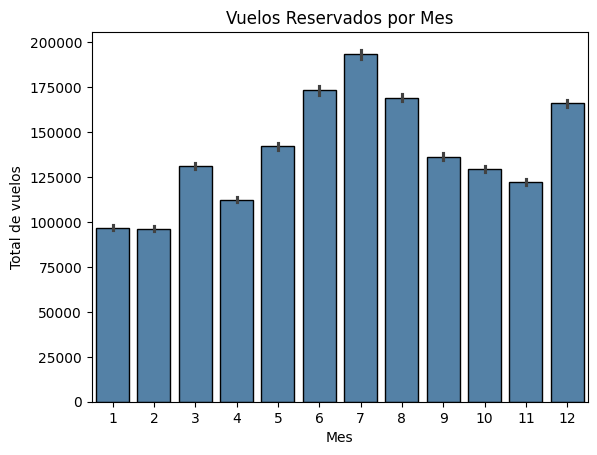

In [25]:
# 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

# Tipo de gráfica: Gráfico de barras
# Razón:
# Un barplot permite comparar una variable numérica y una categórica.
# Aquí:
# - Variable categórica: mes (1–12)
# - Variable numérica: vuelos reservados
# Es útil para detectar patrones estacionales y meses con mayor o menor demanda.

# Visualización → Seaborn
# Hace agregaciones automáticamente (estimator='sum', 'mean', etc.)
# Menos código para obtener gráficos bonitos

sns.barplot(
    data=df_merged,
    x='month',
    y='flights_booked',
    estimator='sum',
    color='steelblue',
    edgecolor='black'
)

plt.title('Vuelos Reservados por Mes')
plt.xlabel('Mes')
plt.ylabel('Total de vuelos')
plt.show()

# Interpretación:
# Los meses de verano (junio-agosto) concentran la mayor cantidad de reservas.
# Diciembre también muestra un volumen elevado.
# Enero y febrero registran los niveles más bajos del año.


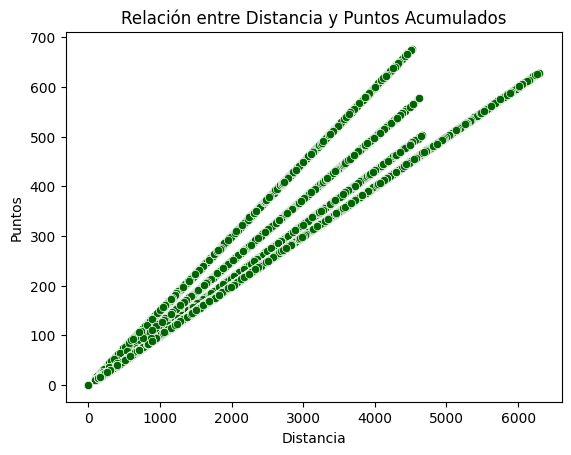

In [26]:
# 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

# Tipo de gráfica: Scatterplot (gráfico de dispersión)
# Razón:
# Un scatterplot permite analizar la relación entre dos variables numéricas.
# Es útil para identificar tendencias, patrones y posibles outliers.
# Aquí:
# - distance: distancia del vuelo
# - points_accumulated: puntos obtenidos por el cliente

# Visualización → Seaborn
# Menos código para obtener gráficos bonitos
sns.scatterplot(
    data=df_merged,
    x='distance',
    y='points_accumulated',
    color='darkgreen',
)

plt.title('Relación entre Distancia y Puntos Acumulados')
plt.xlabel('Distancia')
plt.ylabel('Puntos')
plt.show()

# Interpretación:
# Se observa una relación positiva: a mayor distancia recorrida, mayor cantidad de puntos acumulados.
# Esto indica que el sistema de puntos está directamente vinculado a la distancia del vuelo.


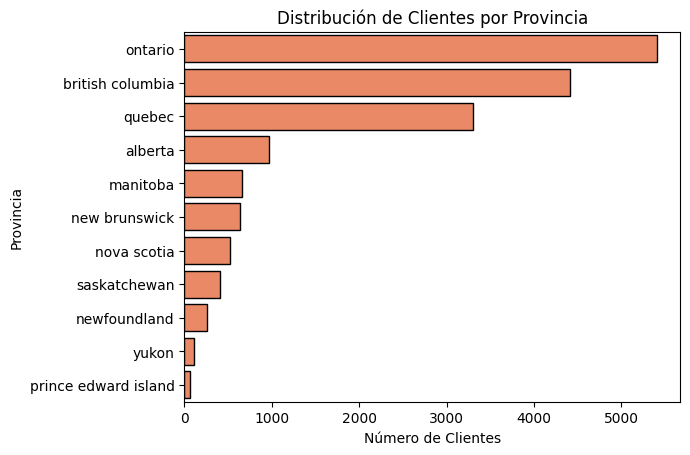

In [27]:
# 3. ¿Cuál es la distribución de los clientes por provincia o estado?

# Tipo de gráfica: Barplot horizontal
# Razón:
# Un barplot permite comparar una variable numérica entre categorías.
# Aquí:
# - Categoría: province
# - Valor numérico: número de clientes únicos (loyalty_number)
# El formato horizontal facilita la lectura cuando hay muchos nombres largos.

clients_by_province = (
    df_merged.groupby('province')['loyalty_number']
    .nunique()
    .sort_values(ascending=False)
    .reset_index()
)

sns.barplot(
    data=clients_by_province,
    x='loyalty_number',
    y='province',
    color='coral',
    edgecolor='black'
)

plt.title('Distribución de Clientes por Provincia')
plt.xlabel('Número de Clientes')
plt.ylabel('Provincia')
plt.show()

# Interpretación:
# Ontario y British Columbia concentran la mayor cantidad de clientes.
# Quebec también muestra una presencia destacada.
# El resto de provincias tiene una representación menor.
# Prince Edward Island es la que cuenta con menos clientes.


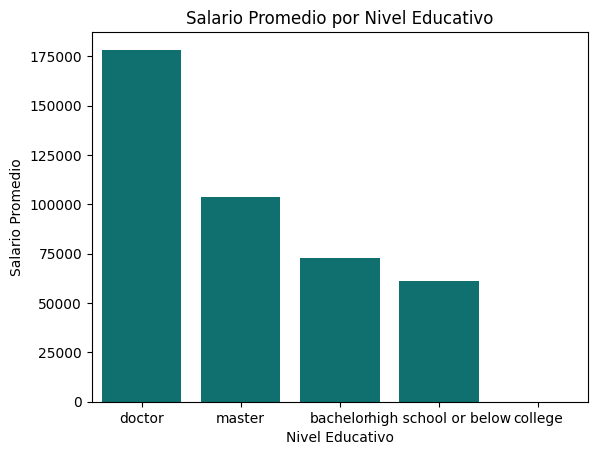

In [28]:
# 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

# Tipo de gráfica: Barplot
# Razón:
# Un barplot permite comparar una variable numérica entre categorías.
# Aquí:
# - Variable categórica: education
# - Variable numérica: salario promedio
# Es útil para visualizar diferencias salariales según nivel educativo.

# Calculamos el salario promedio por nivel educativo 
salary_by_education = (
    df_merged.groupby('education')['salary']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

sns.barplot(
    data=salary_by_education,
    x='education',
    y='salary',
    color='teal'
)

plt.title('Salario Promedio por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.show()

# Los clientes con niveles educativos superiores (máster o doctorado)
# presentan salarios promedio notablemente más altos.
# Los niveles educativos básicos muestran los salarios más bajos,
# lo que sugiere una relación positiva entre educación y poder adquisitivo.


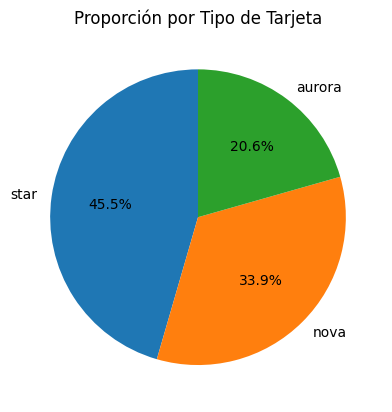

In [29]:
# 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

# Tipo de gráfica: Pie chart
# Razón:
# Se utiliza para analizar una sola variable categórica.
# Variable categórica: loyalty_card → tipos de tarjetas de fidelidad.
# Permite ver qué proporción representa cada categoría dentro del total.

card_distribution = df_merged['loyalty_card'].value_counts()

plt.pie(
    card_distribution,
    labels=card_distribution.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Proporción por Tipo de Tarjeta')
plt.show()

# Interpretación:
# La tarjeta Star concentra la mayor parte de los clientes.
# Nova y Aurora representan proporciones menores dentro del programa.


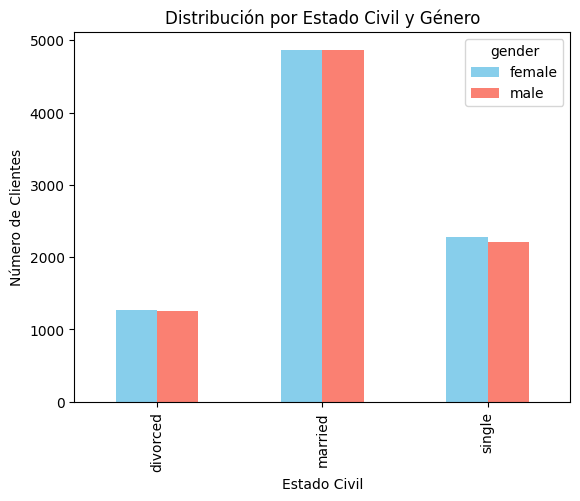

In [30]:
# 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

# Tipo de gráfica: Barras agrupadas
# Razón:
# Compara dos variables categóricas simultáneamente.
# Variables categóricas:
# - marital_status (estado civil)
# - gender (género)

gender_marital = (
    df_merged.groupby(['marital_status', 'gender'])['loyalty_number']
    .nunique()
    .unstack()
)

gender_marital.plot(kind='bar', color=['skyblue', 'salmon'])

plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
plt.title('Distribución por Estado Civil y Género')
plt.show()

# Interpretación:
# Los clientes casados son el grupo más numeroso.
# Los solteros muestran ligera mayoría femenina.
# Los divorciados presentan cifras similares entre géneros.


## Fase 4: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

## Metodología

Se busca evaluar si existen diferencias significativas 
en el número de vuelos reservados 
según el nivel educativo de los clientes. 



,education,count,mean,std,min,25%,50%,75%,max
0,bachelor,252567.0,4.110288,5.221671,0.0,0.0,1.0,8.0,21.0
1,college,102260.0,4.169744,5.246040,0.0,0.0,1.0,8.0,21.0
2,doctor,17731.0,4.175512,5.256971,0.0,0.0,1.0,8.0,21.0
3,high school or below,18915.0,4.176209,5.239267,0.0,0.0,1.0,8.0,21.0
4,master,12287.0,4.200700,5.213956,0.0,0.0,1.0,8.0,21.0


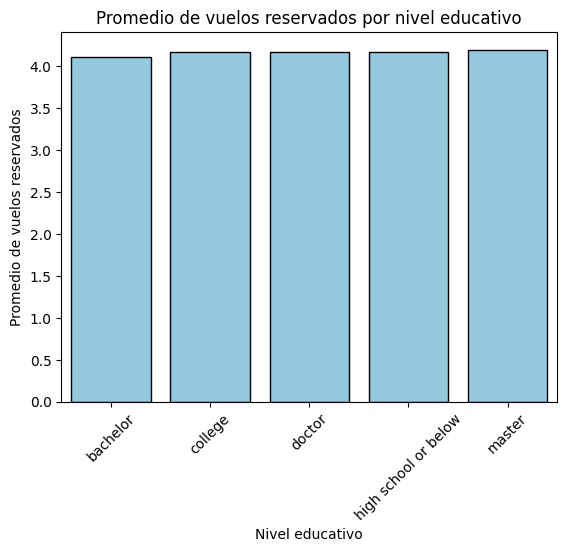

In [31]:
# 1. Preparación de Datos
# Filtramos solo las columnas relevantes: 'flights_booked' y 'education'

df_flights_education = df_merged[['flights_booked', 'education']]
df_flights_education.head()  # comprobación rápida


# 2. Análisis Descriptivo
# Agrupamos por nivel educativo y calculamos estadísticas descriptivas

df_stats_flights_by_education = (
    df_flights_education
    .groupby('education')['flights_booked']
    .describe()
    .reset_index()
)

display(df_stats_flights_by_education)


# 3. Visualización con Seaborn: promedio de vuelos reservados por nivel educativo

sns.barplot(
    data=df_stats_flights_by_education,
    x='education',
    y='mean',
    color='skyblue',
    edgecolor='black'
)

plt.title('Promedio de vuelos reservados por nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Promedio de vuelos reservados')
plt.xticks(rotation=45)
plt.show()

# Interpretación: 
# No se observan diferencias significativas en el promedio de vuelos reservados según nivel educativo. 
# Todos los grupos presentan medias y desviaciones similares, lo que sugiere un comportamiento homogéneo. 
# El nivel educativo no parece influir de forma clara en la cantidad de vuelos reservados.
